In [2]:
import networkx as nx 
import math
from enum import Enum

In [3]:
class NODE_TYPES(Enum):
    Missing = 0
    Mountains = 1
    Hills = 2
    Forest = 3
    Fields = 4
    Pasture = 5
    Desert = 6

class PORTS(Enum):
    Any = 1
    Grain = 2
    Ore = 3
    Wool = 4
    Brick = 5
    Lumber = 6

class ROBBERS(Enum):
    Normal = 1
    See = 3

class ROADS(Enum):
    Missing = 1
    Placed = 2
    Boat = 3

class BUILDINGS(Enum):
    Missing = 1
    Settelment = 2
    City = 3

[]

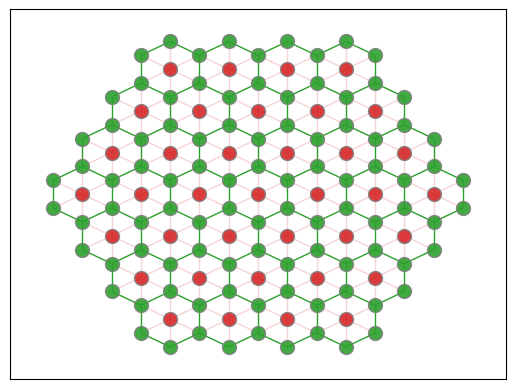

In [29]:
G = nx.Graph()

G.add_nodes_from([
    # Tiles

    # Ports
    # (20, {"type": "port", "port_type": PORTS.Any}),
    # (21, {"type": "port", "port_type": PORTS.Grain}),
    # (22, {"type": "port", "port_type": PORTS.Ore}),
    # (23, {"type": "port", "port_type": PORTS.Any}),
    # (24, {"type": "port", "port_type": PORTS.Wool}),
    # (25, {"type": "port", "port_type": PORTS.Any}),
    # (26, {"type": "port", "port_type": PORTS.Any}),
    # (27, {"type": "port", "port_type": PORTS.Brick}),
    # (28, {"type": "port", "port_type": PORTS.Lumber}),

    # Robber
    (29, {"type": "robber", "rober_type": ROBBERS.Normal}),
])

n_rows = [4, 5, 6, 7, 6, 5, 4]
factor = 1
cnt_tile = 1
centers = []

step_x = 10
step_y = 2.88675134595 

fixed_positions = {}
buildings = []


tile_building = {}


for idx, n_row in enumerate(n_rows):
    first_shift = (max(n_rows) - n_row) * (step_x*0.5)

    for tile in range(n_row):

        y = step_y + (3 * step_y * idx)
        x = (tile * step_x) + first_shift 

        # create tile
        G.add_nodes_from([
            (cnt_tile, {"type": "tile", "node_type": NODE_TYPES.Missing, "dice_value": -1, "coor": (x,y)})
        ])

        # calculate tile place

        

        # store position
        fixed_positions[cnt_tile] =(x, y)

        # calculate positions of building places
        buildings.append((x,                      round(y-(2*step_y), 4)))
        buildings.append((round(x+step_x*0.5, 4), round(y-(1*step_y), 4)))
        buildings.append((round(x+step_x*0.5, 4), round(y+(1*step_y), 4)))
        buildings.append((x,                      round(y+(2*step_y), 4)))
        buildings.append((round(x-step_x*0.5, 4), round(y+(1*step_y), 4)))
        buildings.append((round(x-step_x*0.5, 4), round(y-(1*step_y), 4)))

        tile_building[cnt_tile] = buildings[-6:]

        

        cnt_tile += 1



buildings = list(set(buildings))
buildings.sort(key=lambda x: (x[1], x[0]))  
cnt_buildings = 100
corr_to_index = {}
for x in buildings:
    
    # create building
    G.add_nodes_from([
        (cnt_buildings, {'type': 'building', 'bulding_type': BUILDINGS.Missing, "corr": x})
    ])

    # create provided nodes 
    for tile, porvided in tile_building.items():
        if x in porvided:
         G.add_edge(
             tile,
             cnt_buildings,
             label = {"type": "produce_to", "corr": [tile, cnt_buildings]}
         )


    fixed_positions[cnt_buildings] = x
    corr_to_index[x]  = cnt_buildings
    cnt_buildings +=1 



street_index =  [(0,1),(0,2),(1,3),(2,4),(5,3),(5,4)]
for tile, porvided in tile_building.items():
    porvided.sort(key=lambda x: (x[1], x[0]))
    for a, b in street_index:
         x =corr_to_index[porvided[a]]
         y = corr_to_index[porvided[b]]
         G.add_edge(
             x,
             y,
             label = {"type": "street", "street_type": ROADS.Missing, "coor": [x,y]}
         )




# ports = {
#      20: [77, 81],
#      21: [82, 79],
#      22: [76, 72],
#      23: [62,56],
#      24: [40,45],
#      25: [31,35],
#      26: [33,30],
#      27: [46,41],
#      28: [68, 63],
#  }
# for port in ports:
#      for building in ports[port]:
#          G.add_edge(
#              port,
#              building,
#              label = {"type": "trades"}
#          )

fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)




options = {"edgecolors": "tab:gray", "node_size": 100, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "tile"], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "building"], node_color="tab:green", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "port"], node_color="tab:purple", **options)



#nx.draw_networkx_labels(G, pos, labels={x:x-30 for x in G.nodes()})


nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "produce_to"], edge_color="tab:red", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "street"], edge_color="tab:green")
nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "trades"], edge_color="tab:purple")



In [10]:
[1,2,3,4,5,6][-3:]

[4, 5, 6]